<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Опишим-данные" data-toc-modified-id="Опишим-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Опишим данные<br></a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#F1-Мера" data-toc-modified-id="F1-Мера-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>F1 Мера</a></span></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Порог классификации</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Результат-F1" data-toc-modified-id="Результат-F1-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Результат F1</a></span></li><li><span><a href="#Результат-Accuracy" data-toc-modified-id="Результат-Accuracy-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Результат Accuracy</a></span></li><li><span><a href="#Результат-MAE" data-toc-modified-id="Результат-MAE-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Результат MAE</a></span></li><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>ROC-кривая</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [58]:
# Импортируем библиотеку Pandas.
import pandas as pd
#from pandas import DataFrame
# Импортируем библиотеку для постраения графиков matplotlib.pyplot.
import matplotlib.pyplot as plt
# Импортируем библиотеку для постраения графиков seaborn
import seaborn as sns
# Импортируем библиотеку для высокоуровневых математических функций numpy.
import numpy as np
import math
# Импортируем библиотеки машинного обучения 
from scipy import stats as st 
import sklearn.metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
# Прочитаем исходные DataFrame.
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('Churn.csv')

In [3]:
# Выведем data frame
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Опишим данные<br>
**Признаки**<br>
***RowNumber*** — индекс строки в данных<br>
***CustomerId*** — уникальный идентификатор клиента<br>
***Surname*** — фамилия<br>
***CreditScore*** — кредитный рейтинг<br>
***Geography*** — страна проживания<br>
***Gender*** — пол<br>
***Age*** — возраст<br>
***Tenure*** — сколько лет человек является клиентом банка<br>
***Balance*** — баланс на счёте<br>
***NumOfProducts*** — количество продуктов банка, используемых клиентом<br>
***HasCrCard*** — наличие кредитной карты(1-имеется / 0-отсутствует)<br>
***IsActiveMember*** — активность клиента(1-активен / 0-не активен)<br>
***EstimatedSalary*** — предполагаемая зарплата<br>
**Целевой признак**<br>
***Exited*** — факт ухода клиента(1-остался / 0- ушел)<br> 

In [4]:
df.shape

(10000, 14)

In [5]:
# Посмотрим инфо по DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Проверим какой тип пропусков, далее заменим их на медиану в каждой выборке отдельно
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
# Применим технику прямого кодирования для преобразования категориальных признаков в числовые.
df_ohe = df.drop('Surname', axis=1)
df_ohe = pd.get_dummies(df_ohe, drop_first=False)

In [8]:
df_ohe.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Text(0.5, 1.0, 'Correlation Heatmap')

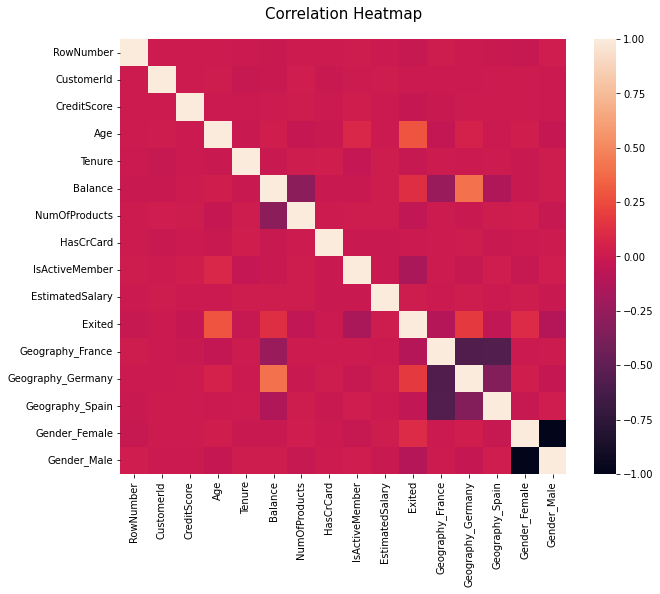

In [11]:
# Проверим на карреляцию
plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(df_ohe.corr(), vmin=-1, vmax=1) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=20)

In [12]:
# Извлечем признаки и целевое знаечение
features = df_ohe.drop(['Exited', 'CustomerId'], axis=1)
target = df_ohe['Exited']

In [13]:
# Разделим обучающую, валидационную и тестовую выборки
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.50, random_state=12345)

In [14]:
# Проверим размеры выборок
print('Размер выборки train:', features_train.shape)
print('Размер выборки valid:', features_valid.shape)
print('Размер выборки test:', features_valid.shape)

Размер выборки train: (6000, 14)
Размер выборки valid: (2000, 14)
Размер выборки test: (2000, 14)


In [15]:
# Заменим NaN в Tenure
features_train['Tenure'] = features_train['Tenure'].fillna(features_train['Tenure'].median())
features_valid['Tenure'] = features_valid['Tenure'].fillna(features_train['Tenure'].median())
features_test['Tenure'] = features_test['Tenure'].fillna(features_train['Tenure'].median())

In [16]:
df_ohe.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [17]:
# Масштабируем признаки методом StandardScaler
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])



In [18]:
print(features_train.head())

      RowNumber  CreditScore       Age    Tenure   Balance  NumOfProducts  \
7479       7480    -0.886751 -0.373192  1.082277  1.232271      -0.891560   
3411       3412     0.608663 -0.183385  1.082277  0.600563      -0.891560   
6027       6028     2.052152  0.480939 -0.737696  1.027098       0.830152   
1247       1248    -1.457915 -1.417129  0.354288 -1.233163       0.830152   
3716       3717     0.130961 -1.132419 -1.101690  1.140475      -0.891560   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
7479   0.642466       -1.055187        -0.187705         -1.005013   
3411  -1.556504       -1.055187        -0.333945          0.995012   
6027  -1.556504        0.947699         1.503095         -1.005013   
1247   0.642466       -1.055187        -1.071061          0.995012   
3716  -1.556504       -1.055187         1.524268         -1.005013   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
7479          -0.572475         1.728977     

## Исследование задачи

In [19]:
# Accuracy для решающего дерева
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)

0.792


0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

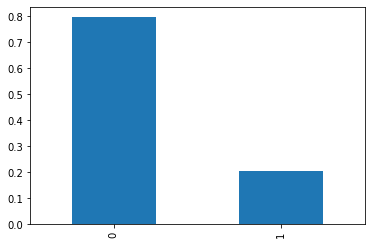

In [20]:
# Посчитаем, как часто в целевом признаке встречается класс «1» или «0» В целевон признаке
class_frequency = df_ohe['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Мы можем наблюдать, что классы сильно разбалансированы. Клиентов, которые останутся(1) всего около 20%

0    0.783
1    0.217
dtype: float64


<AxesSubplot:>

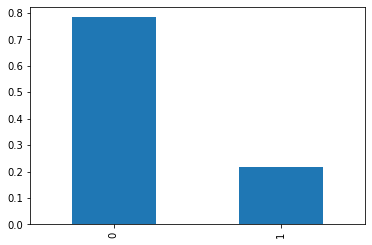

In [21]:
# Проанализируем частоты классов в результатах предсказаний решающего дерева (переменная predicted_valid).
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Мы видим совсем не большие изменения. Клиентов, которые останутся(1) теперь около 22%, это попрежнему очень мало.

In [22]:
# Создим константную модель
target_pred_constant = pd.Series([0]*10000)

print(accuracy_score(target, target_pred_constant))

0.7963


Метрика Accuracy не подходит, так как результат нашей модели и константной практически одиновковы. Это показывает на дисбаланс классов.

In [23]:
# Используем матрицу ошибок
confusion_matrix(target_valid, predicted_valid)

array([[1366,  216],
       [ 200,  218]])

Получаем:<br>
По главной диагонали (от верхнего левого угла) выстроены **правильные прогнозы**:<br>
TN в левом верхнем углу (1366);<br>
TP в правом нижнем углу (218).<br>
Вне главной диагонали — **ошибочные варианты**:<br>
FP в правом верхнем углу (216);<br>
FN в левом нижнем углу (200).<br>

In [24]:
# Используем метрику Полноты (recall)
recall_score(target_valid, predicted_valid)

0.5215311004784688

Полнота — это доля TP-ответов среди всех, у которых истинная метка 1. Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. Если ближе к нулю — модель надо перепроверить и починить.<br>
Наш результат 0.52 - это нам показывает, что модель очень плохо ищет положительные объекты. Необходимо бороться с дисбалансом

In [25]:
# Используем метрику Точности (precision)
precision_score(target_valid, predicted_valid)

0.5023041474654378

Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность. Нам нужна точность, близкая к единице.<br>
Наш результат 0.50

## Борьба с дисбалансом

### F1 Мера

In [26]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5117370892018779


Если положительный класс плохо прогнозируется по одной из шкал (Recall или Precision), то близкая к нулю F1-мера покажет, что прогноз класса 1 не удался.

In [27]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

In [28]:
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4804, 14)
(1196, 14)
(4804,)
(1196,)


Мы видим, что отрицательного класса больше в 4 раза, чем положительного.

In [29]:
# Создадим функцию, которая с учётом полученных данных создаст новую обучающую выборку.
# Перемешает данные, идущие друг за другом.

def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 14)
(9588,)


In [30]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5086848635235732


Мы наблюдаем, что значение F1 = 0.508.

In [31]:
# Воспользуемся техникой upsampling:
# Создадим функцию, которая с учётом полученных данных создаст новую обучающую выборку.
# Перемешает данные, идущие друг за другом.

def downsample(features, target, fraction):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 14)
(2397,)


In [32]:
# Проверим метрику F1 на новых данных
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid =  model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49317406143344705


Используя метод upsampling мы получили результат F1 = 0.49

In [33]:
# Теперь попробуем воспользоваться аргументом class_weight='balanced' в модели
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4975247524752475


Аргументом class_weight='balanced' создает балланс классов в модели. Теперь наш результат F1 = 0.50

### Порог классификации

### Дерево решений

In [35]:
model_t = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model_t.fit(features_train, target_train)
predicted_valid = model_t.predict(features_valid)
print("Accuracy =", model_t.score(features_valid, target_valid))

Accuracy = 0.797


In [36]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4975247524752475


In [37]:
print("MAE =", mean_absolute_error(target_valid, predicted_valid))

MAE = 0.203


In [38]:
# Значение Median
predicted_valid_m = pd.Series(target_train.median(), index=target_valid.index)
print("MAE =", mean_absolute_error(target_valid, predicted_valid_m))

MAE = 0.209


In [39]:
probabilities_valid = model_t.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(probabilities_one_valid[:5])

[0. 0. 0. 1. 0.]


In [40]:
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid) 

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.515, Полнота = 0.481
Порог = 0.02 | Точность = 0.515, Полнота = 0.481
Порог = 0.04 | Точность = 0.515, Полнота = 0.481
Порог = 0.06 | Точность = 0.515, Полнота = 0.481
Порог = 0.08 | Точность = 0.515, Полнота = 0.481
Порог = 0.10 | Точность = 0.515, Полнота = 0.481
Порог = 0.12 | Точность = 0.515, Полнота = 0.481
Порог = 0.14 | Точность = 0.515, Полнота = 0.481
Порог = 0.16 | Точность = 0.515, Полнота = 0.481
Порог = 0.18 | Точность = 0.515, Полнота = 0.481
Порог = 0.20 | Точность = 0.515, Полнота = 0.481
Порог = 0.22 | Точность = 0.515, Полнота = 0.481
Порог = 0.24 | Точность = 0.515, Полнота = 0.481
Порог = 0.26 | Точность = 0.515, Полнота = 0.481
Порог = 0.28 | Точность = 0.515, Полнота = 0.481


In [41]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

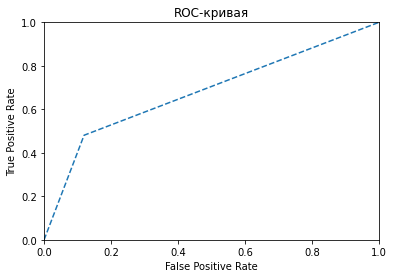

In [42]:
plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)

plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")

plt.show()

In [43]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6806961087352331


### Случайный лес

In [44]:
# Подберем глубину леса при небольшом числе деревьев
for depth in range(1,16,1):
    model_r = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model_r.fit(features_train, target_train)
    predictions_valid = model_r.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(model_r.score(features_valid, target_valid)) 

max_depth = 1 : 0.791
max_depth = 2 : 0.802
max_depth = 3 : 0.8085
max_depth = 4 : 0.821
max_depth = 5 : 0.8385
max_depth = 6 : 0.84
max_depth = 7 : 0.851
max_depth = 8 : 0.8575
max_depth = 9 : 0.8565
max_depth = 10 : 0.861
max_depth = 11 : 0.861
max_depth = 12 : 0.855
max_depth = 13 : 0.858
max_depth = 14 : 0.857
max_depth = 15 : 0.8555


Мы видим, что оптимальная глубина леса это 11 = 0.861.

In [46]:
# Подберем количество деревьев при лучшей глубине 11
for est in range(10,160,10):
    model_r = RandomForestClassifier(n_estimators=est, max_depth=11, random_state=12345)
    model_r.fit(features_train, target_train)
    predicted_valid = model_r.predict(features_valid)
    print("max_est =", est, ": ", end='')
    print(model_r.score(features_valid, target_valid)) 

max_est = 10 : 0.8515
max_est = 20 : 0.861
max_est = 30 : 0.8605
max_est = 40 : 0.8635
max_est = 50 : 0.861
max_est = 60 : 0.8625
max_est = 70 : 0.8625
max_est = 80 : 0.8615
max_est = 90 : 0.862
max_est = 100 : 0.861
max_est = 110 : 0.861
max_est = 120 : 0.8615
max_est = 130 : 0.8615
max_est = 140 : 0.861
max_est = 150 : 0.8625


Мы наблюдаем, что самый высокий результат R2 нам дает 40 деревьев = 0.8635.

In [60]:
# Лучшая модель Случайного леса
model_r = RandomForestClassifier(n_estimators=40, 
    max_depth=11, random_state=12345, class_weight='balanced')
model_r.fit(features_train, target_train)
predicted_valid = model_r.predict(features_valid)
print("Accuracy =", model_r.score(features_valid, target_valid)) 

Accuracy = 0.85


In [48]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6093750000000001


In [49]:
print("MAE =", mean_absolute_error(target_valid, predicted_valid))

MAE = 0.15


In [50]:
# Значение Median
predicted_valid_m = pd.Series(target_train.median(), index=target_valid.index)
print("MAE =", mean_absolute_error(target_valid, predicted_valid_m))

MAE = 0.209


Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением. Чем ближе результат модели к результату константной модели с медианой, тем модель лучше. Резульат 0.05

In [51]:
probabilities_valid = model_r.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(probabilities_one_valid[:5])

[0.07758956 0.59791943 0.35396517 0.20769487 0.06899368]


In [52]:
for threshold in np.arange(0, 0.32, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid) 

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000
Порог = 0.02 | Точность = 0.213, Полнота = 1.000
Порог = 0.04 | Точность = 0.225, Полнота = 0.998
Порог = 0.06 | Точность = 0.237, Полнота = 0.988
Порог = 0.08 | Точность = 0.248, Полнота = 0.962
Порог = 0.10 | Точность = 0.262, Полнота = 0.947
Порог = 0.12 | Точность = 0.276, Полнота = 0.940
Порог = 0.14 | Точность = 0.293, Полнота = 0.933
Порог = 0.16 | Точность = 0.310, Полнота = 0.921
Порог = 0.18 | Точность = 0.328, Полнота = 0.904
Порог = 0.20 | Точность = 0.346, Полнота = 0.892
Порог = 0.22 | Точность = 0.361, Полнота = 0.876
Порог = 0.24 | Точность = 0.379, Полнота = 0.861
Порог = 0.26 | Точность = 0.401, Полнота = 0.840
Порог = 0.28 | Точность = 0.423, Полнота = 0.828
Порог = 0.30 | Точность = 0.435, Полнота = 0.789


In [53]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

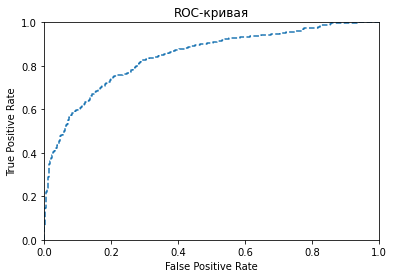

In [54]:
plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)

plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")

plt.show()

In [55]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8443705805140365


## Тестирование модели

### Случайный лес

Проведем тестирование нашей лучшей модели на тестовой выборке.

#### Результат F1

In [61]:
# Объединим две выборки train и valid в одну для обучения модели
features_new = features_train.append(features_valid).reset_index(drop=True)
target_new = target_train.append(target_valid).reset_index(drop=True)

In [62]:
# Перемешаем данные
features_new = shuffle(features_new, random_state=12345)
target_new = shuffle(target_new, random_state=12345)

In [63]:
# Проверим лучшую модель "Случайного леса" на тестовой выборке
model_forest_best = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=11, class_weight='balanced') # Зададим параметр max_depth=7 и n_estimators=120
model_forest_best.fit(features_new, target_new) # Обучим нашу маодельна тренинговой выборке
predicted_test_forest = model_forest_best.predict(features_test)
print("F1:", f1_score(target_test, predicted_test_forest))


F1: 0.5840707964601769


#### Результат Accuracy

In [64]:
print("Accuracy =", model_forest_best.score(features_test, target_test))

Accuracy = 0.8355


#### Результат MAE

In [65]:
# Значение LinearRegression
print("MAE =", mean_absolute_error(target_test, predicted_test_forest))

MAE = 0.1645


In [66]:
# Значение Median
predicted_valid = pd.Series(target_test.median(), index=target_valid.index)
print("MAE =", mean_absolute_error(target_test, predicted_valid))

MAE = 0.2115


Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.
Чем ближе результат модели к результату константной модели с медианой, тем модель лучше.
Резульат нашей модели составляет 0.0005 - это хороший результат

#### ROC-кривая

In [67]:
probabilities_test = model_forest_best.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print(probabilities_one_test[:5])

[0.07998992 0.49643107 0.16735837 0.05413299 0.07034836]


In [68]:
for threshold in np.arange(0, 0.32, 0.02):
    predicted_test = probabilities_one_test > threshold
    precision = precision_score(target_test, predicted_test)
    recall = recall_score(target_test, predicted_test) 

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.211, Полнота = 1.000
Порог = 0.02 | Точность = 0.213, Полнота = 1.000
Порог = 0.04 | Точность = 0.220, Полнота = 0.993
Порог = 0.06 | Точность = 0.231, Полнота = 0.993
Порог = 0.08 | Точность = 0.243, Полнота = 0.981
Порог = 0.10 | Точность = 0.255, Полнота = 0.974
Порог = 0.12 | Точность = 0.273, Полнота = 0.967
Порог = 0.14 | Точность = 0.289, Полнота = 0.955
Порог = 0.16 | Точность = 0.309, Полнота = 0.941
Порог = 0.18 | Точность = 0.328, Полнота = 0.931
Порог = 0.20 | Точность = 0.345, Полнота = 0.913
Порог = 0.22 | Точность = 0.365, Полнота = 0.901
Порог = 0.24 | Точность = 0.383, Полнота = 0.884
Порог = 0.26 | Точность = 0.399, Полнота = 0.861
Порог = 0.28 | Точность = 0.427, Полнота = 0.835
Порог = 0.30 | Точность = 0.450, Полнота = 0.818


In [69]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

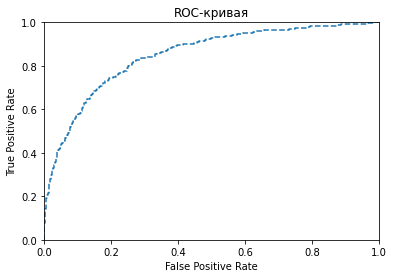

In [70]:
plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)

plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая")

plt.show()

In [71]:
# Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC 
# AUC-ROC изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8481825772668876


Чем больше площадь под кривой (AUC), тем лучше классификация. Максимальное значение 1.0. Наш результат = 0.74